Importing libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

Loading Datasets

In [6]:
df_product = pd.read_csv("../staging/data_set/cleaned_product.csv")
df_feedback = pd.read_csv("../staging/data_set/cleaned_customer_feedback.csv")

Compute Churn

In [7]:
df_product["score_date"] = pd.to_datetime(df_product["score_date"], errors="coerce")
df_product["year_month"] = df_product["score_date"].dt.to_period("M").astype(str)
df_product.sort_values(["id", "year_month"], inplace=True)


def compute_churn(df, col):
    prev = df.groupby("id")[col].shift(1)
    churn = ((prev == 1) & (df[col] == 0)).astype(int)
    return churn

df_product["team_churn"] = compute_churn(df_product, "team_plus")
df_product["pro_churn"] = compute_churn(df_product, "pro_plus")
df_product["ent_churn"] = compute_churn(df_product, "ent_plus")

Merging datasets and grouping

In [8]:
df_feedback["score_date"] = pd.to_datetime(df_feedback["score_date"], errors="coerce")
df_feedback["year_month"] = df_feedback["score_date"].dt.to_period("M").astype(str)

# Merge product and feedback data
df_merged = pd.merge(df_product, df_feedback, on=["id", "year_month"], how="left")


# Group data by NPS and CSAT scores and calculate average churn for each product
nps_churn = df_merged.groupby("nps_score")[["team_churn", "pro_churn", "ent_churn"]].mean().reset_index()
csat_churn = df_merged.groupby("csat_score")[["team_churn", "pro_churn", "ent_churn"]].mean().reset_index()

Plotting

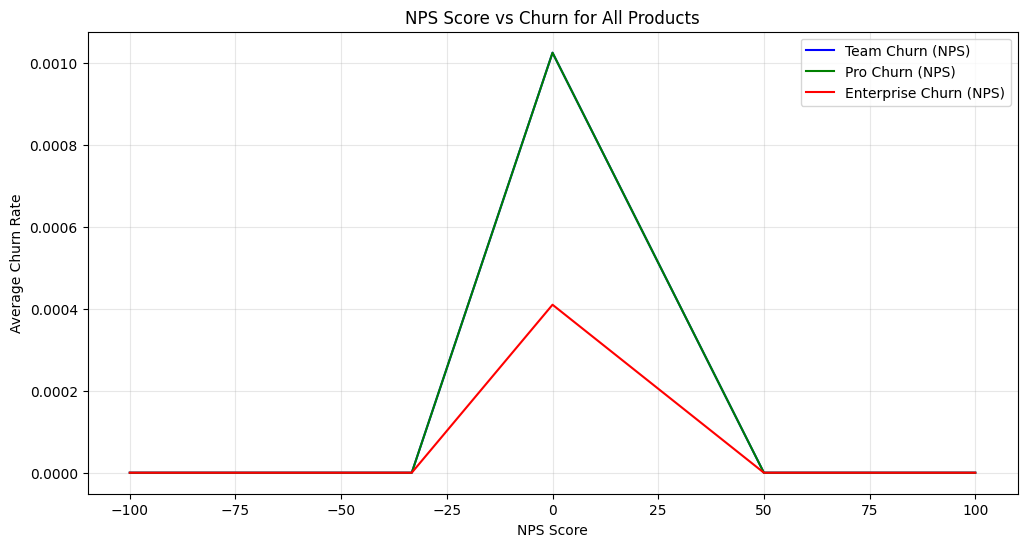

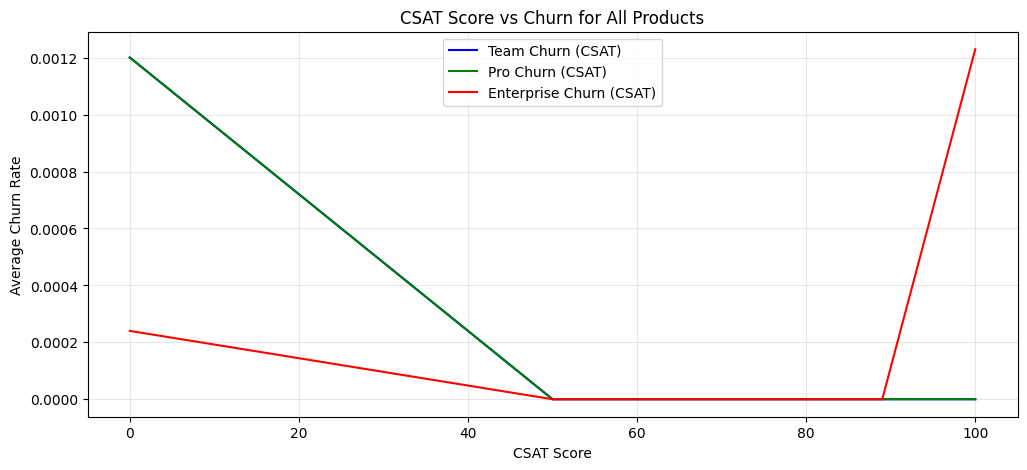

In [10]:
# Plot NPS vs Churn for all products
plt.figure(figsize=(12, 6))
plt.plot(nps_churn["nps_score"], nps_churn["team_churn"], label="Team Churn (NPS)", color="blue")
plt.plot(nps_churn["nps_score"], nps_churn["pro_churn"], label="Pro Churn (NPS)", color="green")
plt.plot(nps_churn["nps_score"], nps_churn["ent_churn"], label="Enterprise Churn (NPS)", color="red")
plt.title("NPS Score vs Churn for All Products")
plt.xlabel("NPS Score")
plt.ylabel("Average Churn Rate")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Plot CSAT vs Churn for all products
plt.figure(figsize=(12, 5))
plt.plot(csat_churn["csat_score"], csat_churn["team_churn"], label="Team Churn (CSAT)", color="blue")
plt.plot(csat_churn["csat_score"], csat_churn["pro_churn"], label="Pro Churn (CSAT)", color="green")
plt.plot(csat_churn["csat_score"], csat_churn["ent_churn"], label="Enterprise Churn (CSAT)", color="red")
plt.title("CSAT Score vs Churn for All Products")
plt.xlabel("CSAT Score")
plt.ylabel("Average Churn Rate")
plt.legend()
plt.grid(alpha=0.3)
plt.show()